# Train Model

## Load dataset

**TODO**
- Generate a bigger dataset, once we drop two entries for beta=0 and beta=-pi we have less than 100 entries.
- Can we have different rotation / operation, e.g. right now we only do the rotation along the x-axis.

In [1]:
import pandas as pd
from IPython.display import display

In [2]:
# Load data for our target gate family (rotations about Bloch sphere x-axis)
df = pd.read_csv("../data/xrotate.csv", header=None)

In [3]:
print(df.shape)

(101, 21)


In [4]:
display(df.head())

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.002061,0.013194,0.018057,0.015902,0.017745,0.017715,0.015825,0.018104,0.013197,0.002148,...,0.000103,0.000088,0.000078,0.000080,0.000031,0.000061,0.000126,3.431545e-05,0.000124,-3.141593
1,-0.002227,-0.013359,-0.017554,-0.015438,-0.017162,-0.017211,-0.015443,-0.017591,-0.013627,-0.001845,...,0.000072,0.000049,0.000033,0.000031,-0.000007,0.000022,0.000083,1.993576e-05,0.000100,-3.078761
2,-0.003243,-0.014217,-0.016003,-0.015864,-0.015976,-0.015975,-0.015850,-0.016015,-0.014253,-0.003144,...,0.000021,0.000005,-0.000008,-0.000011,-0.000030,-0.000011,0.000028,1.926120e-06,0.000052,-3.015929
3,-0.002533,-0.013236,-0.015930,-0.015621,-0.015832,-0.015857,-0.015657,-0.015920,-0.013301,-0.002484,...,-0.000042,-0.000021,0.000003,0.000015,0.000036,0.000008,-0.000044,-2.058282e-05,-0.000058,-2.953097
4,-0.003137,-0.013546,-0.015116,-0.015012,-0.015091,-0.015093,-0.015003,-0.015126,-0.013592,-0.003011,...,0.000029,0.000011,-0.000001,-0.000003,-0.000029,-0.000007,0.000039,2.099520e-08,0.000067,-2.890265


In [5]:
df.drop(0, inplace=True) # Remove row for beta=-pi (same alpha as beta=+pi)
df.drop(50, inplace=True) # Remove row for beta=0

In [6]:
display(df.head())

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1,-0.002227,-0.013359,-0.017554,-0.015438,-0.017162,-0.017211,-0.015443,-0.017591,-0.013627,-0.001845,...,0.000072,0.000049,0.000033,0.000031,-0.000007,0.000022,0.000083,1.993576e-05,0.000100,-3.078761
2,-0.003243,-0.014217,-0.016003,-0.015864,-0.015976,-0.015975,-0.015850,-0.016015,-0.014253,-0.003144,...,0.000021,0.000005,-0.000008,-0.000011,-0.000030,-0.000011,0.000028,1.926120e-06,0.000052,-3.015929
3,-0.002533,-0.013236,-0.015930,-0.015621,-0.015832,-0.015857,-0.015657,-0.015920,-0.013301,-0.002484,...,-0.000042,-0.000021,0.000003,0.000015,0.000036,0.000008,-0.000044,-2.058282e-05,-0.000058,-2.953097
4,-0.003137,-0.013546,-0.015116,-0.015012,-0.015091,-0.015093,-0.015003,-0.015126,-0.013592,-0.003011,...,0.000029,0.000011,-0.000001,-0.000003,-0.000029,-0.000007,0.000039,2.099520e-08,0.000067,-2.890265
5,-0.003040,-0.013286,-0.014874,-0.014792,-0.014853,-0.014853,-0.014784,-0.014882,-0.013323,-0.002937,...,0.000026,0.000010,-0.000001,-0.000003,-0.000029,-0.000008,0.000036,-3.342383e-06,0.000065,-2.827433


In [7]:
print('Data set shape', df.shape)
print('- Entries', df.shape[0])
print('- Alphas ', df.shape[1]-1)
print('- Beta   ', 1)

Data set shape (99, 21)
- Entries 99
- Alphas  20
- Beta    1


## Dataset split

In [8]:
import tensorflow as tf
print('Tensorflow ver.', tf.__version__)

Tensorflow ver. 2.4.0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, Y_train, Y_test = train_test_split(df.iloc[:,20], df.iloc[:,:20], test_size=0.3, random_state=5)

In [11]:
print('Train set shape: ', Y_train.shape)
print('Test set shape:  ', Y_test.shape)

Train set shape:  (69, 20)
Test set shape:   (30, 20)


In [12]:
display(Y_train.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7,-0.002817,-0.012643,-0.014290,-0.014179,-0.014266,-0.014268,-0.014160,-0.014310,-0.012728,-0.002641,0.000032,0.000023,7.738888e-06,-0.000002,-0.000002,-0.000029,-0.000008,0.000036,-0.000007,0.000068
90,0.002547,0.011736,0.013390,0.013254,0.013348,0.013362,0.013250,0.013407,0.011858,0.002440,0.000038,0.000024,6.709055e-06,-0.000003,-0.000003,-0.000035,-0.000011,0.000040,-0.000012,0.000080
66,0.000843,0.004494,0.005376,0.005263,0.005302,0.005337,0.005330,0.005348,0.004565,0.000867,0.000060,0.000033,8.369026e-06,-0.000005,-0.000004,-0.000061,-0.000026,0.000050,-0.000039,0.000127
27,-0.001158,-0.006254,-0.007623,-0.007594,-0.007648,-0.007629,-0.007517,-0.007676,-0.006345,-0.000983,0.000042,0.000016,5.054930e-07,-0.000005,-0.000002,-0.000044,-0.000021,0.000032,-0.000036,0.000090
49,-0.000065,-0.000253,-0.000314,-0.000392,-0.000392,-0.000352,-0.000283,-0.000376,-0.000277,0.000086,0.000080,0.000046,1.267596e-05,-0.000006,-0.000005,-0.000081,-0.000035,0.000066,-0.000052,0.000168


## Save dataset

In [13]:
import numpy as np
np.save('../data/x_train.npy', x_train)
np.save('../data/x_test.npy', x_test)
np.save('../data/Y_train.npy', Y_train)
np.save('../data/Y_test.npy', Y_test)

## Visualize dataset

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

It is interesting to notice that the first ten pulses are on a wider range of values, while the second half of the pulses seem more limited.
- Is there an explanation?
- Can this be combined with reinforcement learning?
- Are all of the 20 pulses necessary? Can we have less pulses so a smaller model?

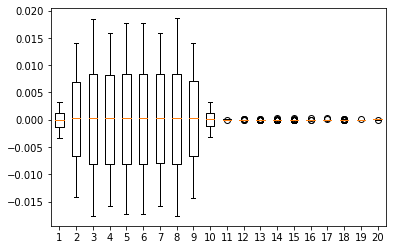

In [15]:
_ = plt.boxplot(df.iloc[:,:20], showfliers=True)

This is the second half.

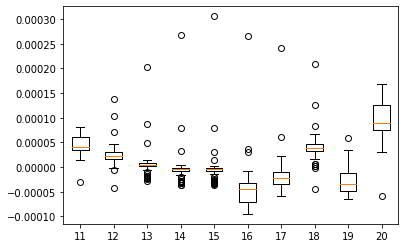

In [16]:
_ = plt.boxplot(df.iloc[:,10:20], showfliers=True, positions=np.arange(11,21,1))

This is the first entry in the dataset. Notice the difference between the first and second halfs of the pulses

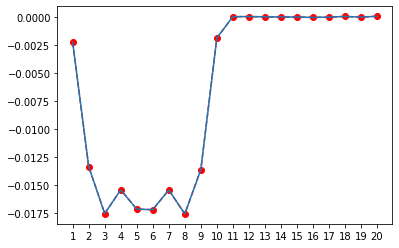

In [17]:
x = np.arange(1, 21, 1)
y = df.iloc[0:1,:20].to_numpy()[0]
plt.plot(x, y, marker='o', linestyle='--', color='r') 
plt.xticks(x, x)
plt.plot(x, y)
plt.show()

This is the second half of the first entry.

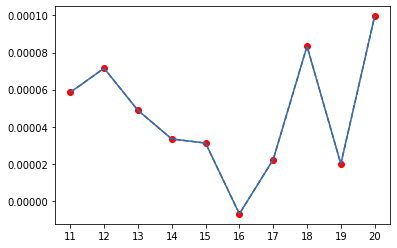

In [18]:
x = np.arange(11, 21, 1)
y = df.iloc[0:1,10:20].to_numpy()[0]
plt.plot(x, y, marker='o', linestyle='--', color='r') 
plt.xticks(x, x)
plt.plot(x, y)
plt.show()

Plot all of the entries in the dataset.

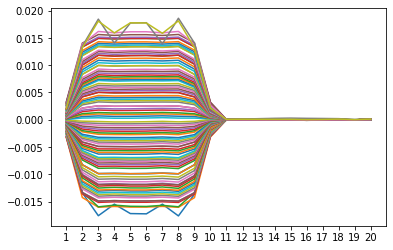

In [19]:
x = np.arange(1, 21, 1)
for i in range(99):
    y = df.iloc[i:i+1,:20].to_numpy()[0]
    plt.xticks(x, x)
    plt.plot(x, y)
plt.show()

And once again, plot only the second half for all of the entries in the dataset.

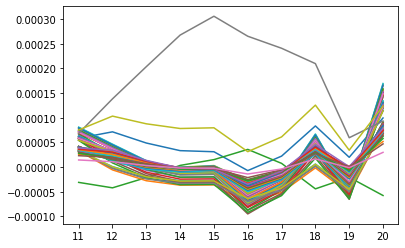

In [20]:
x = np.arange(11, 21, 1)
for i in range(99):
    y = df.iloc[i:i+1,10:20].to_numpy()[0]
    plt.xticks(x, x)
    plt.plot(x, y)
plt.show()

## Create model

### Keras Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import os
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [22]:
model = Sequential()
model.add(Dense(4, input_shape=(1,), name='fc1', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu1'))
model.add(Dense(8, name='fc2e', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu2e'))
model.add(Dense(11, name='fc3', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3'))
model.add(Dense(11, name='fc3e', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3e'))
model.add(Dense(11, name='fc3e2', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3e2'))
model.add(Dense(11, name='fc3e4', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3e4'))
model.add(Dense(11, name='fc3e3', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3e3'))
model.add(Dense(20, name='output', kernel_initializer='lecun_uniform'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 4)                 8         
_________________________________________________________________
relu1 (Activation)           (None, 4)                 0         
_________________________________________________________________
fc2e (Dense)                 (None, 8)                 40        
_________________________________________________________________
relu2e (Activation)          (None, 8)                 0         
_________________________________________________________________
fc3 (Dense)                  (None, 11)                99        
_________________________________________________________________
relu3 (Activation)           (None, 11)                0         
_________________________________________________________________
fc3e (Dense)                 (None, 11)                1

In [24]:
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####           1
               Dense   XXXXX -------------------         8     0.9%
                relu   #####           4
               Dense   XXXXX -------------------        40     4.4%
                relu   #####           8
               Dense   XXXXX -------------------        99    10.8%
                relu   #####          11
               Dense   XXXXX -------------------       132    14.4%
                relu   #####          11
               Dense   XXXXX -------------------       132    14.4%
                relu   #####          11
               Dense   XXXXX -------------------       132    14.4%
                relu   #####          11
               Dense   XXXXX -------------------       132    14.4%
                relu   #####          11
               Dense   XXXXX -------------------       240    26.2%
                       #####          20


### QKeras model

In [25]:
import qkeras
from qkeras.qlayers import QDense, QActivation
from qkeras.quantizers import quantized_bits, quantized_relu

In [26]:
# Build quantized model
qmodel = tf.keras.models.Sequential()
qmodel.add(QDense(4, input_shape=(1,), name='fc1',
                 kernel_quantizer=quantized_bits(14,2,alpha=1,qnoise_factor=1.0), bias_quantizer=quantized_bits(14,2,alpha=1,qnoise_factor=1.0),
                 kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(14,2,qnoise_factor=1.0), name='relu1'))
qmodel.add(QDense(8, name='fc2e',
                 kernel_quantizer=quantized_bits(12,1,alpha=1,qnoise_factor=1.0), bias_quantizer=quantized_bits(12,2,alpha=1,qnoise_factor=1.0),
                 kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(12,2,qnoise_factor=1.0), name='relu2e'))
qmodel.add(QDense(11, name='fc3',
                 kernel_quantizer=quantized_bits(10,0,alpha=1,qnoise_factor=1.0), bias_quantizer=quantized_bits(10,0,alpha=1,qnoise_factor=1.0),
                 kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(12,2,qnoise_factor=1.0), name='relu3'))
qmodel.add(QDense(11, name='fc3e',
                 kernel_quantizer=quantized_bits(10,1,alpha=1,qnoise_factor=1.0), bias_quantizer=quantized_bits(10,2,alpha=1,qnoise_factor=1.0),
                 kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(10,2,qnoise_factor=1.0), name='relu3e'))
qmodel.add(QDense(11, name='fc3e2',
                 kernel_quantizer=quantized_bits(10,1,alpha=1,qnoise_factor=1.0), bias_quantizer=quantized_bits(10,0,alpha=1,qnoise_factor=1.0),
                 kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(10,2,qnoise_factor=1.0), name='relu3e2'))
qmodel.add(QDense(11, name='fc3e4',
                 kernel_quantizer=quantized_bits(10,1,alpha=1,qnoise_factor=1.0), bias_quantizer=quantized_bits(10,0,alpha=1,qnoise_factor=1.0),
                 kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(10,2,qnoise_factor=1.0), name='relu3e4'))
qmodel.add(QDense(11, name='fc3e3',
                 kernel_quantizer=quantized_bits(10,1,alpha=1,qnoise_factor=1.0), bias_quantizer=quantized_bits(10,0,alpha=1,qnoise_factor=1.0),
                 kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(10,2,qnoise_factor=1.0), name='relu3e3'))
qmodel.add(QDense(20, name='output',
                 kernel_quantizer=quantized_bits(12,0,alpha=1,qnoise_factor=1.0), bias_quantizer=quantized_bits(12,0,alpha=1,qnoise_factor=1.0),
                 kernel_initializer='lecun_uniform'))

## Training

In [27]:
from callbacks import all_callbacks

### Keras model

In [28]:
train = False
if train:
    model.compile(optimizer=tf.optimizers.Adam(lr=0.001),
                  loss=tf.losses.MeanSquaredError(),
                  metrics=[
                      tf.metrics.MeanSquaredLogarithmicError(),
                      tf.metrics.MeanSquaredError(),
                      tf.metrics.MeanAbsolutePercentageError()
                  ])
    callbacks = all_callbacks(stop_patience = 1000,
                              lr_factor = 0.5,
                              lr_patience = 100,
                              lr_epsilon = 0.000001,
                              lr_cooldown = 2,
                              lr_minimum = 0.0000001,
                              outputDir = '../model/training')
    history = model.fit(x_train, Y_train, epochs=5000, validation_split=0.30, callbacks=callbacks.callbacks, verbose=1)
    model.save("../model/model.h5")
else:
    from tensorflow.keras.models import load_model
    model = tf.keras.models.load_model('../model/model.h5')

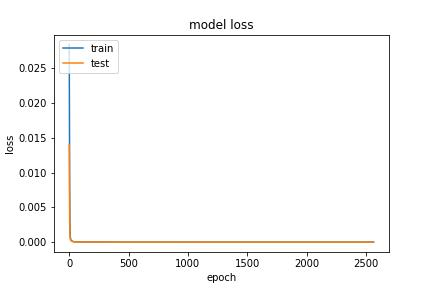

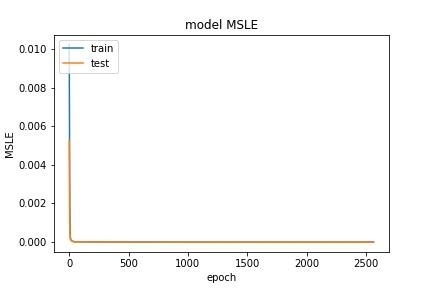

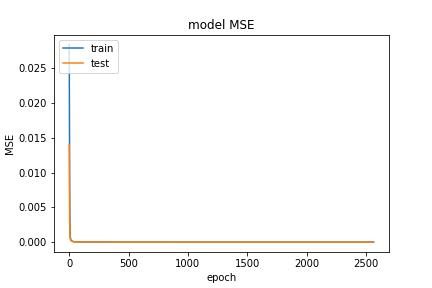

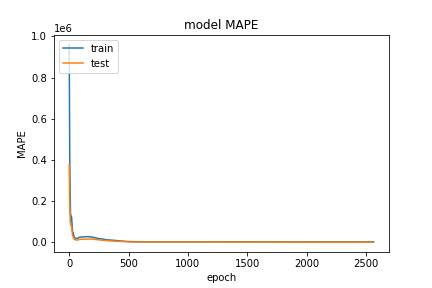

In [29]:
if train:
    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/history_loss.jpg')
    plt.show()

    # Summarize history for MSLE
    plt.plot(history.history['mean_squared_logarithmic_error'])
    plt.plot(history.history['val_mean_squared_logarithmic_error'])
    plt.title('model MSLE')
    plt.ylabel('MSLE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/history_msle.jpg')
    plt.show()

    # Summarize history for MSE
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['val_mean_squared_error'])
    plt.title('model MSE')
    plt.ylabel('MSE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/history_mse.jpg')
    plt.show()

    # Summarize history for MAPE
    plt.plot(history.history['mean_absolute_percentage_error'])
    plt.plot(history.history['val_mean_absolute_percentage_error'])
    plt.title('model MAPE')
    plt.ylabel('MAPE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/history_mape.jpg')
    plt.show()
else:
    from PIL import Image

    img = Image.open('../model/history_loss.jpg')
    display(img)
    
    img = Image.open('../model/history_msle.jpg')
    display(img)
    
    img = Image.open('../model/history_mse.jpg')
    display(img)
    
    img = Image.open('../model/history_mape.jpg')
    display(img)

### QKeras model

In [30]:
train = False # Set this to True to retrain the model. Otherwise, load trained model.
if train:
    qmodel.compile(optimizer=tf.optimizers.Adam(lr=0.001),
                  loss=tf.losses.MeanSquaredError(),
                  metrics=[
                      tf.metrics.MeanSquaredLogarithmicError(),
                      tf.metrics.MeanSquaredError(),
                      tf.metrics.MeanAbsolutePercentageError()
                  ])
    callbacks = all_callbacks(stop_patience=1000,
                                lr_factor=0.5,
                                lr_patience=100,
                                lr_epsilon=0.000001,
                                lr_cooldown=2,
                                lr_minimum=0.0000001,
                                outputDir="../model/qtraining")
    qhistory = qmodel.fit(x_train, Y_train, epochs=5000, validation_split=0.30, callbacks=callbacks.callbacks, verbose=1)
    qmodel.save("../model/qmodel.h5")
else:
    co = {}
    qkeras.utils._add_supported_quantized_objects(co)
    qmodel = tf.keras.models.load_model("../model/qmodel.h5", custom_objects=co)

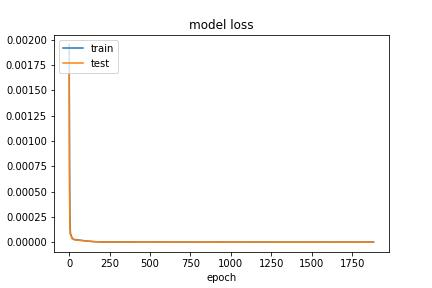

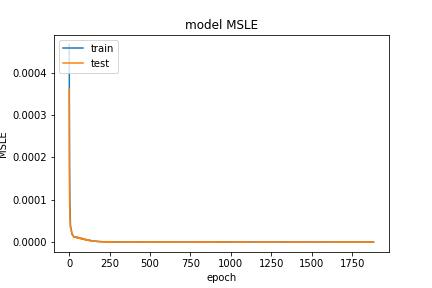

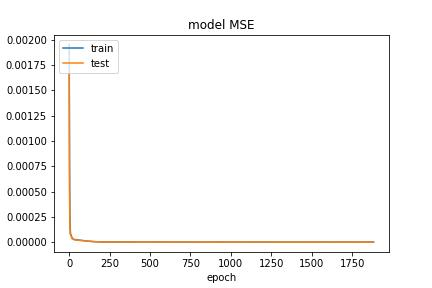

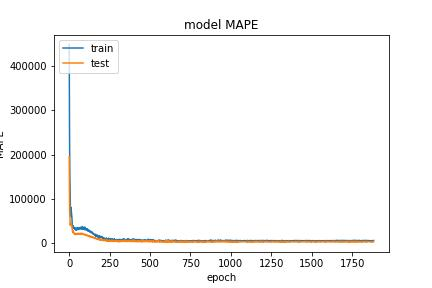

In [31]:
if train:
    # Summarize history for loss
    plt.plot(qhistory.history['loss'])
    plt.plot(qhistory.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/history_qloss.jpg')
    plt.show()

    # Summarize history for MSLE
    plt.plot(qhistory.history['mean_squared_logarithmic_error'])
    plt.plot(qhistory.history['val_mean_squared_logarithmic_error'])
    plt.title('model MSLE')
    plt.ylabel('MSLE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/history_qmsle.jpg')
    plt.show()

    # Summarize history for MSE
    plt.plot(qhistory.history['mean_squared_error'])
    plt.plot(qhistory.history['val_mean_squared_error'])
    plt.title('model MSE')
    plt.ylabel('MSE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/history_qmse.jpg')
    plt.show()

    # Summarize history for MAPE
    plt.plot(qhistory.history['mean_absolute_percentage_error'])
    plt.plot(qhistory.history['val_mean_absolute_percentage_error'])
    plt.title('model MAPE')
    plt.ylabel('MAPE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/history_qmape.jpg')
    plt.show()
else:
    from PIL import Image

    img = Image.open('../model/history_qloss.jpg')
    display(img)
    
    img = Image.open('../model/history_qmsle.jpg')
    display(img)
    
    img = Image.open('../model/history_qmse.jpg')
    display(img)
    
    img = Image.open('../model/history_qmape.jpg')
    display(img)

## Evaluation

Compute and compare the following metrics for the Keras and QKeras model
- Loss
- Mean Squared Logarithmic Error (MSLE)
- Mean Square Error (MSE)
- Mean Absolute Percentage Error (MAPE)

In [32]:
loss, msle, mse, mape = model.evaluate(x_test, Y_test)
qloss, qmsle, qmse, qmape = qmodel.evaluate(x_test, Y_test)

1/1 [==============================] - 0s 454ms/step - loss: 8.0679e-07 - mean_squared_logarithmic_error: 4.9740e-07 - mean_squared_error: 8.0679e-07 - mean_absolute_percentage_error: 5299.4604


In [33]:
with pd.option_context('display.float_format', '{:0.12f}'.format):
    data = pd.DataFrame([["Keras", loss, msle, mse, mape], ["QKeras", qloss, qmsle, qmse, qmape]], columns=["", "Loss", "MSLE", "MSE", "MAPE"])
    display(data)

,,Loss,MSLE,MSE,MAPE
0,Keras,0.000000408733,0.000000118644,0.000000408733,2230.679687500000
1,QKeras,0.000000806788,0.000000497402,0.000000806788,5299.460449218750


In [34]:
Y_qkeras = qmodel.predict(x_test)
Y_keras = model.predict(x_test)

Plot and compare the Keras and QKeras predictions with the reference in the dataset.

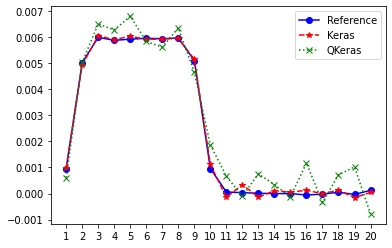

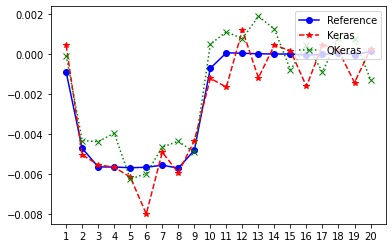

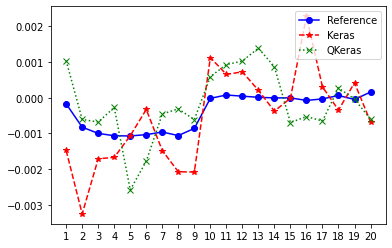

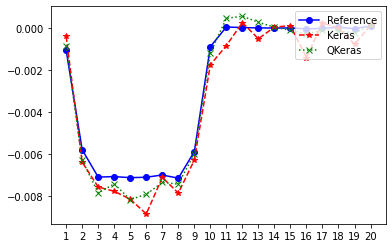

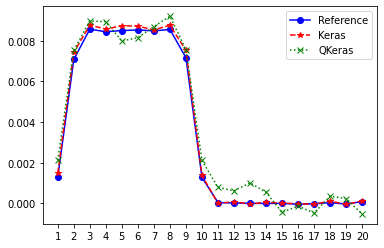

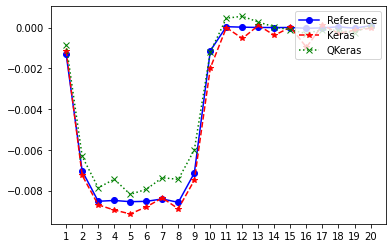

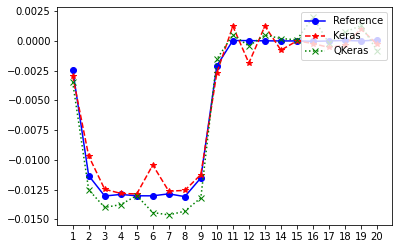

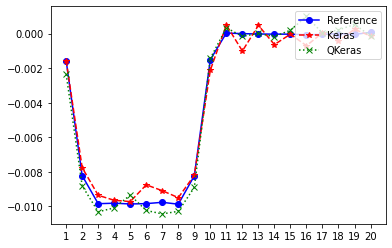

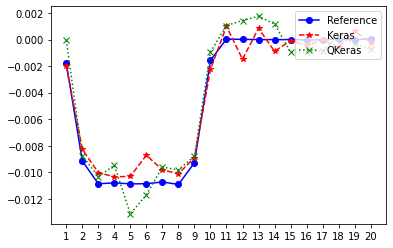

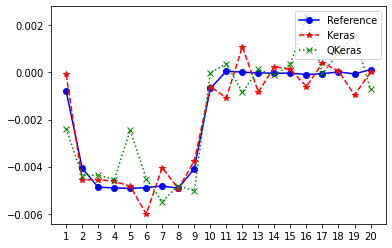

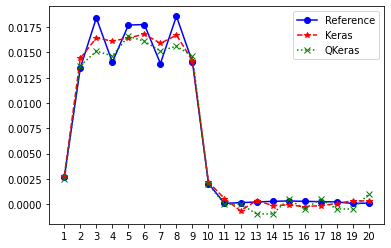

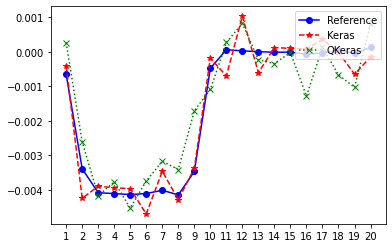

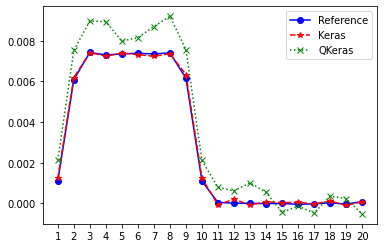

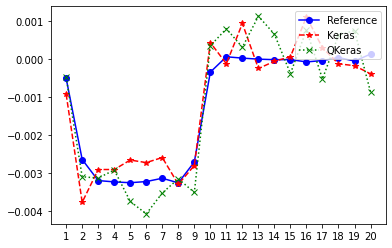

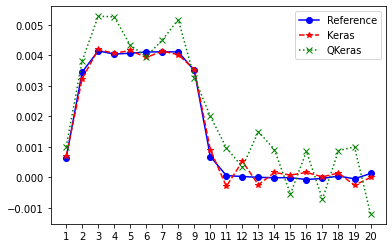

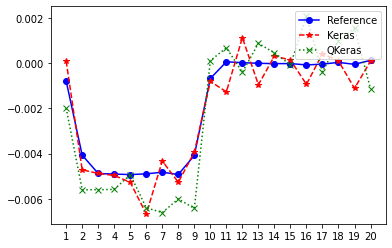

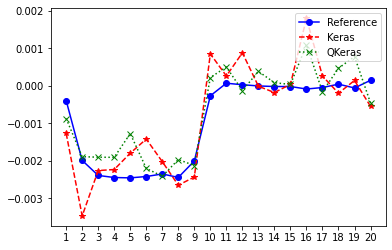

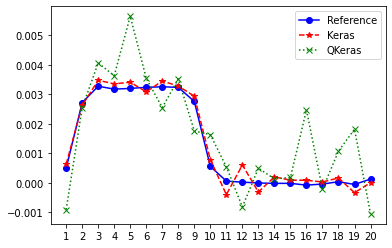

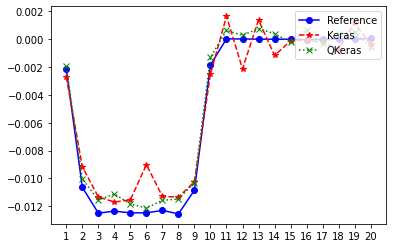

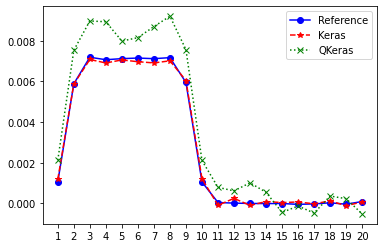

In [35]:
x = np.arange(1, 21, 1)
for i in range(20):
    plt.clf()
    plt.plot(x, Y_test.to_numpy()[i], marker='o', linestyle='-', color='b') 
    plt.plot(x, Y_keras[i], marker='*', linestyle='--', color='r')
    plt.plot(x, Y_qkeras[i], marker='x', linestyle=':', color='g')
    plt.xticks(x, x)
    plt.legend(['Reference', 'Keras', 'QKeras'], loc='upper right')
    plt.show()